*tool - jupyter notebook 

## 마케팅 효과 분석: 마케팅 포인트와 주가와의 상관관계 분석

## 2. 주가 모멘텀 분석
* 주가 참고 사이트 : http://www.thinkpool.com/itemanal/i/index.jsp?mcd=Q0&code=035760&Gcode=000_002


* 예시)
    * 미디어주 분석
    * CJ ENM(035760)  
         - https://finance.naver.com/item/sise_day.nhn?code=069960&page=1

### 0) 패키지 설치

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fname = fm.FontProperties(fname='malgun.ttf').get_name()
mpl.rc('font',family=fname)
import matplotlib.gridspec as gridspec

### 1) 필요한 데이터 호출
- 함수: selData(whr=' where SIDX=0')

In [2]:
dbname='NaverStock.db'
def selData(whr=' where SIDX=0'):
    with sqlite3.connect(dbname) as conn:
        cur=conn.cursor()
        sql='select SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL from StockDay '+whr
        cur.execute(sql)
        rows=cur.fetchall()
        cur.close()
    return rows

In [3]:
whr = 'where SDAY>20200101 and SCODE="035760" order by SDAY asc limit 250'
res = selData(whr)
cols = ['SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
df = pd.DataFrame(data=res, columns = cols)
df.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20200102,159300,159400,151000,155600,125376
1,20200103,155800,157500,153100,154700,98855
2,20200106,153000,153900,150200,150200,78272
3,20200107,150300,154600,150300,154600,65431
4,20200108,152700,153200,150700,151300,75841


- 주가 시각화

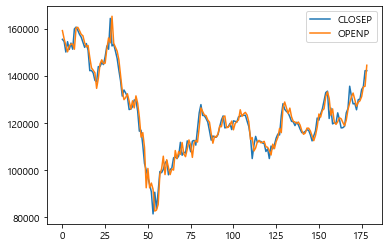

In [4]:
sels = ['CLOSEP','OPENP']
df[sels].plot()

### 2) 이동평균선
* 주가 기술분석
* 단기 이평선(5일 이평선) 장기 이평선(30일 이평선)을 설정
* 장단기 이평선을 분석
    * 골든크로스 (단기 이평선이 장기 이평선을 아래에서 위로 통과) > 매수
    * 데드크로스 (단기 이평선이 장기 이평선을 위에서 아래로 통과) > 매도
    * 마케팅의 시장평가 지점을 지정


* 함수: makeMV(baseday=5, basedata=df['CLOSEP'])

In [5]:
def makeMV(baseday=5, basedata=df['CLOSEP']):
    res = []
    # 초기화 하기: 1-4일까지는 평균이 안나오니 0으로 채우기
    for i in range(baseday-1):
        res.append(0)
    # 이동평균 데이터 만들기
    n = len(basedata)-(baseday-1)
    print("총 데이터수:",len(basedata),"초기화 안되고 채워야할 부분:",n)
    for i in range(n):
        mvdata = np.average(basedata[i:i+baseday])
        res.append(mvdata)
    return res

In [6]:
# 이동평균선 값 df에 넣기
df['MV5'] = makeMV(5)
df['MV30'] = makeMV(30)
df.head()

총 데이터수: 179 초기화 안되고 채워야할 부분: 175
총 데이터수: 179 초기화 안되고 채워야할 부분: 150


,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30
0,20200102,159300,159400,151000,155600,125376,0.0,0.0
1,20200103,155800,157500,153100,154700,98855,0.0,0.0
2,20200106,153000,153900,150200,150200,78272,0.0,0.0
3,20200107,150300,154600,150300,154600,65431,0.0,0.0
4,20200108,152700,153200,150700,151300,75841,153280.0,0.0


<function matplotlib.pyplot.show(*args, **kw)>

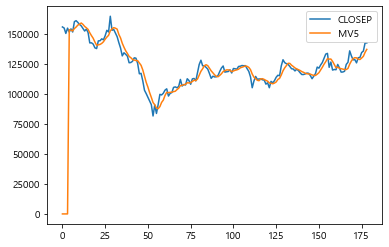

In [7]:
# 시각화
df[['CLOSEP','MV5']].plot()
plt.legend()
plt.show

- 함수화 과정

총 데이터수: 179 초기화 안되고 채워야할 부분: 175


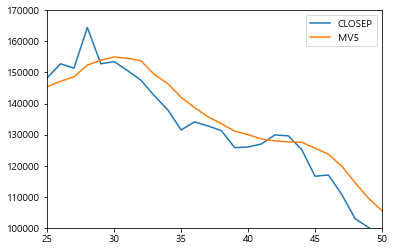

In [8]:
res = []
baseday=5 # 5일 평균선
basedata = df['CLOSEP']

# 초기화 하기: 1-4일까지는 평균이 안나오니 0으로 채우기
for i in range(baseday-1):
    res.append(0)
    
# 이동평균 데이터 만들기
n = len(basedata)-(baseday-1)
print("총 데이터수:",len(basedata),"초기화 안되고 채워야할 부분:",n)

for i in range(n):
    mvdata = np.average(basedata[i:i+baseday])
    res.append(mvdata)

# 시각화
df['CLOSEP'].plot()
plt.plot(res,label='MV5') # 5일동안의 평균 지점(MV5)
plt.xlim(25,50)
plt.ylim(100000,170000)
plt.legend()
plt.show()

### 3) 성장 모멘텀
#### 장단기 크로스 포인트 분석
* 주가 장단기 이평선에 관한 크로스 포인트 분석
* 이를 통해 시장에 반영된 마케팅 기준선을 부여

<function matplotlib.pyplot.show(*args, **kw)>

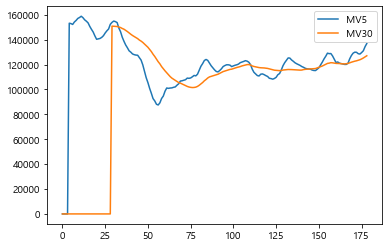

In [9]:
df[['MV5','MV30']].plot()
# plt.xlim(0,10)
# plt.ylim(150000, 170000)
plt.legend()
plt.show

In [10]:
# 장단기 주가 모멘텀
short = df['MV5']
long = df['MV30']
res = []

# 초기화
longday = 30
for i in range(longday):
    res.append(0)
for i in range(longday, len(short)):
    if(short[i]>long[i]):
        res.append(1)
    else:
        res.append(-1)
df['holdPos'] = res
df.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30,holdPos
0,20200102,159300,159400,151000,155600,125376,0.0,0.0,0
1,20200103,155800,157500,153100,154700,98855,0.0,0.0,0
2,20200106,153000,153900,150200,150200,78272,0.0,0.0,0
3,20200107,150300,154600,150300,154600,65431,0.0,0.0,0
4,20200108,152700,153200,150700,151300,75841,153280.0,0.0,0


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


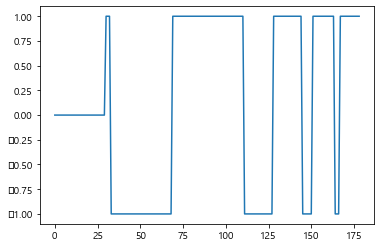

In [11]:
plt.plot(res)

#### 성장동력과 크로스포인트와의 관계
* 단기 성장성(성장비율)과 장단기 주가 모멘텀 분석
* 실질적 주가에 영향을 주는 마케팅 포인트 지점 획득

<ipython-input-12-ccc24ab48d42>:5: RuntimeWarning: invalid value encountered in double_scalars
  c = ((baseData[i]/baseData[i-1])-1)*20  # 증폭
<ipython-input-12-ccc24ab48d42>:5: RuntimeWarning: divide by zero encountered in double_scalars
  c = ((baseData[i]/baseData[i-1])-1)*20  # 증폭
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


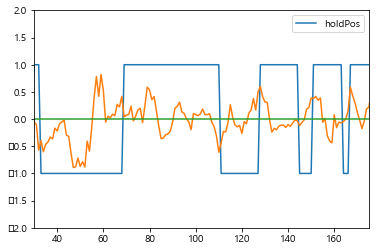

In [12]:
baseData = df['MV5']
res = []
for i in range(1,len(baseData)):
    # 단기 성장성: 어제 MV5 대비 오늘 MV5
    c = ((baseData[i]/baseData[i-1])-1)*20  # 증폭
    res.append(c)

# 시각화로 비교해보기
df['holdPos'].plot()
plt.plot(res)
plt.plot([0,175],[0,0]) # 0 기준선 그리기
plt.legend()
plt.xlim(30,175)
plt.ylim(-2,2)
plt.show()

### 4) 캔들차트 분석
* 라이브러리: mpl_finance
* 시가 고가 저가 종가를 분석하여 마케팅의 적시적 효과를 보기 위함
 <img src = "candle.png" />
 
        - 양봉 망치형: 악재를 모두 소진했다
        - 음봉 망치형: 악재를 어느정도 소진, 최악X
        - 양봉 역망치형: 어느정도 호재가 깎임 > 관망
        - 음봉 역망치형: 악재 잔존 > 매도
        - 십자가형: 매수=매도 탄탄하게 버팀 > 관망

In [13]:
# 라이브러리 다운로드
#1.
!pip install mplfinance
#2.
!pip install mpl_finance
!pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in c:\anaconda3\lib\site-packages (0.12.7a0)


In [14]:
from mpl_finance import candlestick_ohlc

C:\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [15]:
# OPENP -> HIGHP -> LOWP -> CLOSEP -> VOL
lMin = 70
lMax = 120
cols = ['OPENP','HIGHP','LOWP','CLOSEP']
cdata = df[cols].values[lMin:lMax]   # 디테일한 부분 보기
voldata = df['VOL'].values[lMin:lMax]
days = df['SDAY'].values[lMin:lMax]
gmv5 = df['MV5'].values[lMin:lMax]
gmv30 = df['MV30'].values[lMin:lMax]

xtic = np.arange(0, len(days), step=3) # 인터벌 생성
xdays = [days[i]-20000000 for i in xtic]
xdays, xtic

([200413,
  200417,
  200422,
  200427,
  200504,
  200508,
  200513,
  200518,
  200521,
  200526,
  200529,
  200603,
  200608,
  200611,
  200616,
  200619,
  200624],
 array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48]))

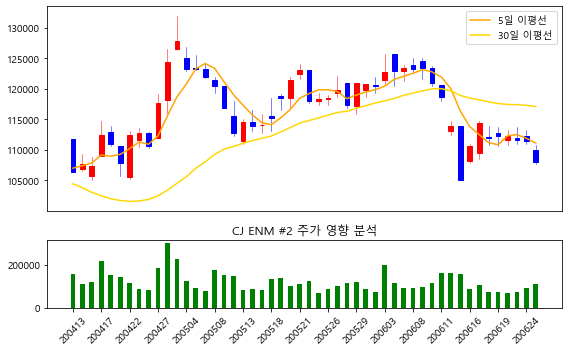

In [16]:
# 그림비율
fig = plt.figure(figsize=(8,5))

# 그리드 2행 1열짜리 높이비율 3:1로 생성
gs = gridspec.GridSpec(2,1,height_ratios=[3,1])
axis = []
# 축 선정
axis.append(plt.subplot(gs[0]))
# axis[0]을 그리드 공유
axis.append(plt.subplot(gs[1],sharex=axis[0]))
# 공유 x축 표시 없애기
axis[0].get_xaxis().set_visible(False)

# 캔들스틱용 데이터 만들기
x = np.arange(len(cdata))
xa = np.reshape(x, (-1,1)) # x 형태 세로로 변환
ohlc = np.hstack((xa,cdata)) # xa와 cdata 한 덩어리로 만들기

# 캔들스틱 그리기
candlestick_ohlc(axis[0], ohlc, width=0.5, colorup='r', colordown='b')

# 거래량 그래프
axis[1].bar(x, voldata, color='g', width=0.5)
plt.title("CJ ENM #2 주가 영향 분석")

plt.xticks(xtic, xdays, rotation=45)  # xticks(넣을 위치, 넣을 라벨)

# 이동평균선 그리기
axis[0].plot(gmv5, color='orange', label="5일 이평선")
axis[0].plot(gmv30, color='gold', label="30일 이평선") 
axis[0].legend()
plt.tight_layout() # 가늘고 예쁘게 만들어줌
plt.savefig('cchart_cjenm.jpg')
plt.show()

ㄴ> 특이점 있는 날짜 발견 시 네이버 데이터랩, 구글에 가서 검색하기
ㄴ> 키워드 예시: cj enm 2020.06.14

### 5) 경쟁사(동종업계) 분석
- 동종 유사 주가의 경쟁사 분석을 통해 시장기준 주가 분석


- 참고사이트: [씽크풀](http://www.thinkpool.com/itemanal/i/index.jsp?mcd=Q0&code=035760&Gcode=000_002)

In [17]:
# 동종업계 기업(경쟁사) 데이터 가져오기
whr = 'where SDAY>20200101 and SCODE="028150" order by SDAY asc limit 250'
res = selData(whr)
cols = ['SDAY','OPENP','HIGHP','LOWP','CLOSEP','VOL']
dfgs = pd.DataFrame(data=res, columns = cols)
dfgs.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL
0,20200102,148600,148600,146400,146500,14920
1,20200103,148200,148200,145800,145800,16373
2,20200106,145700,146400,143000,143000,16978
3,20200107,142700,144400,141200,142000,12613
4,20200108,141800,141800,138100,139400,21254


In [18]:
df['gsClose'] = dfgs['CLOSEP']
df.head()

,SDAY,OPENP,HIGHP,LOWP,CLOSEP,VOL,MV5,MV30,holdPos,gsClose
0,20200102,159300,159400,151000,155600,125376,0.0,0.0,0,146500.0
1,20200103,155800,157500,153100,154700,98855,0.0,0.0,0,145800.0
2,20200106,153000,153900,150200,150200,78272,0.0,0.0,0,143000.0
3,20200107,150300,154600,150300,154600,65431,0.0,0.0,0,142000.0
4,20200108,152700,153200,150700,151300,75841,153280.0,0.0,0,139400.0


<function matplotlib.pyplot.show(*args, **kw)>

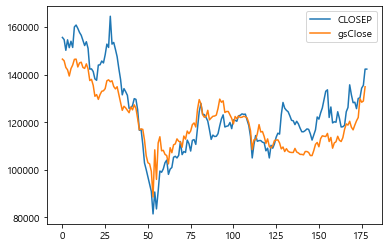

In [20]:
df[['CLOSEP','gsClose']].plot()
# plt.xlim(0,10)
# plt.ylim(150000, 170000)
plt.legend()
plt.show